# Linear Token Bonding Curve Templates

**Abstract :** For economies which are expected to attract a significant number of supporters and user activity, we suggest that a linear curve together with a secondary market will be the most viable way to create the desired market structure which will both keep the token price in-line with its perceived intrinsic value while allowing the community to organize different activities around the creator coin market. 

### TBC Template #1 : Static price for pre-sale, linear curve for market maturity phase

Brief description of different market phases supported by this template are mentioned below -

![TBC Template #1 : Static price for pre-sale, linear curve for market maturity phase](./curves/template1.png)

- Genesis Mint : CCs minted against minimal RLY locked
- Pre-Sale - CCs sold at a fixed price denominated in RLY
- Market Maturity - Liquidity provided by an exchange pricing function, y = m*x + c


The linear curve on the right supports early market phases such as ‘pre-sale’ for the associated creator coin community members and the liquidity bootstrapping phase during which the price of the CC will increase proportionally to the increase in total circulating supply.


### TBC Template #2 : Linear curve for pre-sale and market maturity phase

Brief description of different market phases supported by this template are mentioned below -

![TBC Template #2 : Linear curve for pre-sale and market maturity phase](./curves/template2.png)

- Genesis Mint : CCs minted against minimal RLY locked
- Pre-Sale - Liquidity provided by a linear exchange pricing function, y = m*x + c
- Market Maturity - Liquidity provided by an exchange pricing function, y = m*x + c

The max supply of Creator Coins that can be minted is capped.


### TBC Template #3 : Logarithmic curve for pre-sale and linear curve for market maturity phase

Brief description of different market phases supported by this template are mentioned below -

![TBC Template #3 : Logarithmic curve for pre-sale and linear curve for market maturity phase](./curves/template3.png)

- Genesis Mint : CCs minted against minimal RLY locked
- Pre-Sale - Liquidity provided by a logarithmic exchange pricing function, price = C1 + C2*log(x) 
- Market Maturity - Liquidity provided by an exchange pricing function, y = m*x + c

The max supply of Creator Coins that can be minted is capped.


## What is Rally Network ?
Rally is building a platform that will be supported by various well-designed defi primitives as the underlying building blocks for its economy, allowing creators to create and structure their own virtual economies, ultimately creating a completely new kind of composable social economy network toolkit integrable across various emerging community driven DAOs and social media networks! (Twitch, Discord, Twitter and many more)



### About Creator Coins 
 - Rally Network allows any social media influencer / high-net worth individual to launch his own Creator Coin on the Rally Network. Each Creator Coin is backed by its own Token Bonding Curve providing immediate liquidity to the economy participants, at a price defined by the exchange pricing function which can be customized as per the needs and objectives of the emerging social economy networks.



In [194]:
import math
import time
from scipy.stats import norm
import numpy as np
from datetime import date,datetime,timedelta, timezone
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)

# TBC Template #1 : Static price for pre-sale, linear curve for market maturity phase

Brief description of different market phases supported by this template are mentioned below -

![TBC Template #1 : Static price for pre-sale, linear curve for market maturity phase](./curves/template1.png)

- Genesis Mint : CCs minted against minimal RLY locked
- Pre-Sale - CCs sold at a fixed price denominated in RLY
- Market Maturity - Liquidity provided by an exchange pricing function, y = m*x + c

The max supply of Creator Coins that can be minted is capped.

In [205]:
# Parameters
total_CC_Supply = 21000000            # 21 Million
RLY_total_locked_target = 210000000   # 210 Million

genesis_supply = 5000000 # 5 Million

totalRallyLocked = 0    

# Pre-Sale Parameters
_CCsSold_presale = 2000000  # 2 Million
_RLY_Locked_presale = 2000000 # 2 Million
_CCprice_presale = _RLY_Locked_presale / _CCsSold_presale # static price during pre-sale

In [206]:
df = pd.DataFrame([], columns = ['date', 'timestamp','slope','CC To be Minted','RLY To be Locked',
                                 'CCs : Price (RLY)','CCs : Delta Supply','CCs : Total Supply',
                                 'RLY : Delta Locked','RLY : Total Locked',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked','+2% depth: RLY/CC',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked','-2% depth: RLY/CC',
                                 'Reserve Ratio','Note']) 
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')

unix = datetime(1970, 1, 1)
cur_  = datetime(2021, 1, 1)

deltaTime = timedelta(minutes=1)

##### Adding first row (Phase 0)

In [207]:
df.loc[0] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),0,total_CC_Supply,RLY_total_locked_target
                         ,0,0,0,0,0,0,0,0,0,0,0,0, 'Phase 0']

In [208]:
# display(df)

## Genesis Supply

In [209]:
gen_percent_of_total = genesis_supply/total_CC_Supply * 100
print('Genesis Supply = ',genesis_supply,' CCs, which equals ',
      round(gen_percent_of_total,2),'% of the total CCs supply cap of '      ,total_CC_Supply )

Genesis Supply =  5000000  CCs, which equals  23.81 % of the total CCs supply cap of  21000000


In [210]:
##### Adding 2nd row : State after Genesis Mint

In [211]:
cur_ = cur_ + deltaTime
df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                         0,total_CC_Supply - genesis_supply,RLY_total_locked_target,0,genesis_supply,genesis_supply,0,0,0,0,0,0,0,0,0,'Genesis Mint']

In [212]:
display(df)

,date,timestamp,slope,CC To be Minted,RLY To be Locked,CCs : Price (RLY),CCs : Delta Supply,CCs : Total Supply,RLY : Delta Locked,RLY : Total Locked,+2% depth: CCs Minted,+2% depth: RLY Locked,+2% depth: RLY/CC,-2% depth: CCs Burnt,-2% depth: RLY Un-Locked,-2% depth: RLY/CC,Reserve Ratio,Note
0,2021-01-01 00:00:00,1609459200,0,21000000,210000000,0,0,0,0,0,0,0,0,0,0,0,0,Phase 0
1,2021-01-01 00:01:00,1609459260,0,16000000,210000000,0,5000000,5000000,0,0,0,0,0,0,0,0,0,Genesis Mint


## Pre-Sale

In [213]:
finalPrice_presale = _CCprice_presale

print('CCs sold at a fixed price of '+ str(finalPrice_presale) + ' RLY during the pre-sale')

print('\nTotal CCs sold during pre-sale = ' + str(_CCsSold_presale) )
print('Total RLY bonded to the TBC during pre-sale = ' + str(_RLY_Locked_presale) )
print('CC price after the pre-sale = ' + str(finalPrice_presale) + ' RLY')

CCs sold at a fixed price of 1.0 RLY during the pre-sale

Total CCs sold during pre-sale = 2000000
Total RLY bonded to the TBC during pre-sale = 2000000
CC price after the pre-sale = 1.0 RLY


##### Adding State after Pre-Sale

In [214]:
def getNormalDistributionValues(mean, deviation, numberOfPoints) :
    normalPoints_ =  np.random.normal(mean, deviation, numberOfPoints)
    return normalPoints_

In [215]:
def costOfMinting(price,prevCCSupply,newCCSupply): 
    dif = price*(newCCSupply - prevCCSupply) 
    return dif

In [216]:
currentSold = 100

deltaSupplies = getNormalDistributionValues(1000, 1000,1000)
i =0

while currentSold < _CCsSold_presale: 
    cur_ = cur_ + deltaTime
    
    if i < 1000:
        if deltaSupplies[i] > 0:
            CC_deltaSupply = deltaSupplies[i]
        i = i + 1
    else :        
        deltaSupplies = getNormalDistributionValues(1000, 1000,1000)
        i = 0
        if deltaSupplies[i] > 0:
            CC_deltaSupply = deltaSupplies[i]

    total_CCs_to_be_minted = df.loc[len(df.index)-1,'CC To be Minted'] - CC_deltaSupply
    CC_totalSupply = df.loc[len(df.index)-1,'CCs : Total Supply'] + CC_deltaSupply
    
#     print('Total Supply = ' + str(CC_totalSupply) + '   Delta Supply = ' + str(CC_deltaSupply) )
    
    # functional calculation      
    CC_price_RLY = _CCprice_presale
    mintCost_RLY = costOfMinting(CC_price_RLY,df.loc[len(df.index)-1,'CCs : Total Supply'],CC_totalSupply)
    
    pos_depth_CC_minted = 0
    pos_depth_RLY_locked = 0
    pos_depth_RLY_per_CC = CC_price_RLY
    neg_depth_CC_burnt = 0
    neg_depth_RLY_unlocked = 0
    neg_depth_RLY_per_CC = CC_price_RLY
            
    currentSold = currentSold + CC_deltaSupply
    
    RLY_DeltaLocked = mintCost_RLY # CC_deltaSupply * CC_price_RLY
    RLY_TotalLocked = df.loc[len(df.index)-1,'RLY : Total Locked'] + RLY_DeltaLocked
    total_RLY_to_be_locked = df.loc[len(df.index)-1,'RLY To be Locked'] - RLY_DeltaLocked
    reserve_ratio = RLY_TotalLocked / CC_totalSupply
    slope = 0

    note = str(CC_deltaSupply) + ' CCs sold for ' + str(RLY_DeltaLocked) + ' RLY'

    df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'), int((cur_ - unix).total_seconds()),
                             slope,  total_CCs_to_be_minted,  total_RLY_to_be_locked,   CC_price_RLY, 
                             CC_deltaSupply,  CC_totalSupply,   RLY_DeltaLocked,   RLY_TotalLocked,   
                             pos_depth_CC_minted,   pos_depth_RLY_locked,   pos_depth_RLY_per_CC,
                             neg_depth_CC_burnt,   neg_depth_RLY_unlocked,   neg_depth_RLY_per_CC,
                             reserve_ratio,   note]


In [217]:
# display(df)
metrics = df

In [218]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],label='CC price vs total CC supply')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],label='CC Reserve Ratio vs total CC supply')
# plt.xlabel('Creator Coin : Total Supply (scale = 10 Million)',fontsize = 15)
# plt.ylabel('Creator Coin : Price (RLY)',fontsize = 15)
# plt.title('Price, Reserve Ratio vs Total Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_presale_Price_Reserve_Ratio_vs_Supply_PRESALE.png')

In [219]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],label='CCs : Total Supply')
# plt.plot(metrics.loc[:,'RLY : Total Locked'],label='RLY : Total Locked')
# plt.xlabel('timestamps (simulated)',fontsize = 15)
# plt.ylabel('Total Supply (Millions)',fontsize = 15)
# plt.title('Total Creator Coins, RLY Locked vs Time (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_supplies_vs_time_PRESALE.png')

In [220]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: CCs Minted'],label='+2% depth: CCs Minted')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],label='+2% depth: RLY Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Delta Supply',fontsize = 15)
# plt.title('+ 2% Market Depth : delta CCs minted, RLY Locked vs Total CC Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_posDepthDeltaCC_RLY_vs_TotalCCSupply_PRESALE.png')

In [221]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'+2% depth: RLY Locked'],metrics.loc[:,'+2% depth: CCs Minted'],label='Delta RLY Locked vs Delta CC Minted')

# plt.xlabel('Delta RLY Locked for +2% depth',fontsize = 15)
# plt.ylabel('Delta CCs Minted for +2% depth',fontsize = 15)
# plt.title('+2% depth : Delta RLY Locked vs Delta CCs Minted (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_posDepth_DeltaCC_vs_DeltaRLY_PRESALE.png')

In [222]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: CCs Burnt'],label='-2% depth: CCs Burnt')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],label='-2% depth: RLY Un-Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Total Supply (Millions)',fontsize = 15)
# plt.title('- 2% Depth : delta CCs burnt, RLY Un-Locked vs Total CC Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_negDepthDeltaCC_RLY_vs_TotalCCSupply_PRESALE.png')

In [223]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'-2% depth: RLY Un-Locked'],metrics.loc[:,'-2% depth: CCs Burnt'],label='Delta RLY Un-Locked vs Delta CC Burnt')

# plt.xlabel('RLY Un-Locked for -2% depth',fontsize = 15)
# plt.ylabel('CCs Burnt for -2% depth',fontsize = 15)
# plt.title('-2% depth : Delta RLY un-Locked vs Delta CCs Burnt (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_negDepth_DeltaCC_vs_DeltaRLY_PRESALE.png')

## Market Maturity : Automated Liquidity via the Bonding Curve

- CCs ca be bought / sold via the Bonding Curve.
    y = mx + c

In [224]:
Rly_to_be_locked = df.loc[len(df.index)-1,'RLY To be Locked']
cc_price = df.loc[len(df.index)-1,'CCs : Price (RLY)']
cc_current_supply = df.loc[len(df.index)-1,'CCs : Total Supply']


CC_finalPrice = (Rly_to_be_locked - 0.5*cc_price*total_CC_Supply + 0.5*cc_price*cc_current_supply) / (0.5*total_CC_Supply - 0.5*cc_current_supply)

slope1 = (CC_finalPrice - cc_price)/ (total_CC_Supply - cc_current_supply)
constant1 = (cc_price*total_CC_Supply - CC_finalPrice*cc_current_supply) / (total_CC_Supply - cc_current_supply)


print('Exchange pricing function for CC Market Maturity phase : CC price (RLY) = ' + str(slope1) + ' * CCs Supply ' + str(constant1) )

print('\nTotal CCs sold during Market Maturity phase = ' + str(df.loc[len(df.index)-1,'CC To be Minted']) )
print('Total RLY bonded to the TBC during Market Maturity phase = ' + str(df.loc[len(df.index)-1,'RLY To be Locked']) )
print('Final CC price : ' + str(CC_finalPrice) + ' RLY')

Exchange pricing function for CC Market Maturity phase : CC price (RLY) = 1.9798033972940225e-06 * CCs Supply -12.860104744538216

Total CCs sold during Market Maturity phase = 13999251.964370739
Total RLY bonded to the TBC during Market Maturity phase = 207999251.9643709
Final CC price : 28.715766598636257 RLY


In [225]:
def costOfMinting(c,slope,prevCCSupply,newCCSupply): 
    # integral of m*x + c
    dif = c*(newCCSupply - prevCCSupply) + 0.5*slope*(pow(newCCSupply,2)-pow(prevCCSupply,2)) 
    return dif

In [226]:
_5_perc_analysis_df = pd.DataFrame([], columns = ['date', 'timestamp','CCs : Price (RLY)','CCs : Total Supply','RLY : Total Locked',
                                                 '5% CCs Sold','RLY Unlocked','Price Impact (%)','RLY Unlocked (%)','New Price' ]) 
# _5_perc_analysis_df['date'] = pd.to_datetime(_5_perc_analysis_df['date'],format='%d/%m/%Y')



In [227]:
CCstobeMinted = df.loc[len(df.index)-1,'CC To be Minted']
    
deltaSupplies = getNormalDistributionValues(700, 1000,1000)
i =0
    
while CCstobeMinted > 0:
    cur_ = cur_ + deltaTime  # date updated

    if i < 1000:
        CC_deltaSupply = deltaSupplies[i]
        i = i + 1
    else :
        deltaSupplies = getNormalDistributionValues(700, 1000,1000)
        i = 0
        CC_deltaSupply = deltaSupplies[i]
    
    total_CCs_to_be_minted = df.loc[len(df.index)-1,'CC To be Minted'] - CC_deltaSupply
    CC_totalSupply = df.loc[len(df.index)-1,'CCs : Total Supply'] + CC_deltaSupply
    
    # functional calculation      
    CC_price_RLY = slope1*CC_totalSupply + constant1
    mintCost_RLY = costOfMinting(constant1,slope1,df.loc[len(df.index)-1,'CCs : Total Supply'],CC_totalSupply)

    pos_depth_CC_minted = CC_price_RLY * 0.02 / slope1
    pos_depth_RLY_locked = costOfMinting(constant1,slope1,CC_totalSupply, CC_totalSupply + pos_depth_CC_minted)
    pos_depth_RLY_per_CC = round(pos_depth_RLY_locked/pos_depth_CC_minted,3)
    neg_depth_CC_burnt = CC_price_RLY * 0.02 / slope1
    neg_depth_RLY_unlocked = -1 * costOfMinting(constant1,slope1,CC_totalSupply, CC_totalSupply - neg_depth_CC_burnt)
    neg_depth_RLY_per_CC = round(neg_depth_RLY_unlocked/neg_depth_CC_burnt,3)
 
    RLY_DeltaLocked = mintCost_RLY
    RLY_TotalLocked = df.loc[len(df.index)-1,'RLY : Total Locked'] + RLY_DeltaLocked
    total_RLY_to_be_locked = df.loc[len(df.index)-1,'RLY To be Locked'] - RLY_DeltaLocked
    reserve_ratio = RLY_TotalLocked / CC_totalSupply
    
    # 5% CCs sold Analysis
    _5_per_tot_sup = .05 * CC_totalSupply     # 5 % of total supply
    sell_5_per_tot_sup_new_price = slope1*(CC_totalSupply - _5_per_tot_sup) + constant1
    sell_5_per_tot_sup_price_impact = 100 * (CC_price_RLY - sell_5_per_tot_sup_new_price)/CC_price_RLY
    sell_5_per_RLY_unlocked = -1 * costOfMinting(constant1, slope1, CC_totalSupply, CC_totalSupply - _5_per_tot_sup )
    sell_5_per_RLY_unlocked_per_tot_locked = 100 * (sell_5_per_RLY_unlocked)/RLY_TotalLocked

    
    
    note = 'Mint Transaction'

    df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                             slope1,total_CCs_to_be_minted,total_RLY_to_be_locked, CC_price_RLY, CC_deltaSupply, CC_totalSupply,
                             RLY_DeltaLocked,RLY_TotalLocked,pos_depth_CC_minted,pos_depth_RLY_locked,pos_depth_RLY_per_CC,
                             neg_depth_CC_burnt,neg_depth_RLY_unlocked,neg_depth_RLY_per_CC,
                             reserve_ratio,note]
    
    
    _5_perc_analysis_df.loc[len(_5_perc_analysis_df.index)] = [ pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                                                            CC_price_RLY , CC_totalSupply, RLY_TotalLocked, _5_per_tot_sup, sell_5_per_RLY_unlocked, sell_5_per_tot_sup_price_impact, 
                                                            sell_5_per_RLY_unlocked_per_tot_locked , sell_5_per_tot_sup_new_price  ]
    
    CCstobeMinted = df.loc[len(df.index)-1,'CC To be Minted']

In [228]:
# display(df)
metrics = df

In [229]:
# df.tail(4)

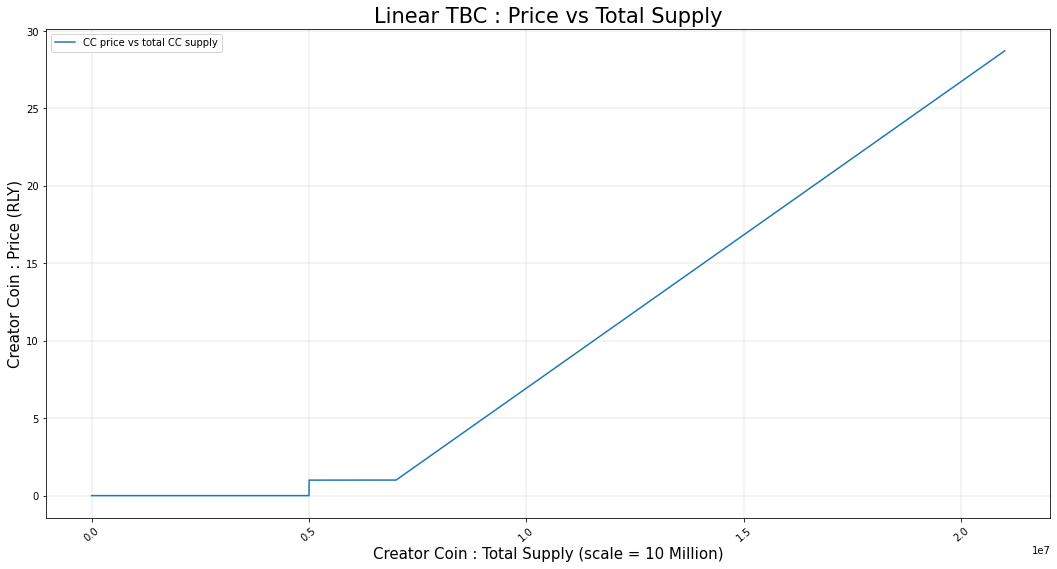

In [230]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=40)
plt.grid(linewidth=0.3)
plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],label='CC price vs total CC supply')
plt.xlabel('Creator Coin : Total Supply (scale = 10 Million)',fontsize = 15)
plt.ylabel('Creator Coin : Price (RLY)',fontsize = 15)
plt.title('Linear TBC : Price vs Total Supply',fontsize = 21)
plt.legend()
# plt.savefig('./images/large_CC_TBC/1_Price_vs_Supply.png')

In [231]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],label='CC price vs total CC supply')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],label='CC Reserve Ratio vs total CC supply')

# plt.xlabel('Creator Coin : Total Supply (scale = 10 Million)',fontsize = 15)
# plt.ylabel('Creator Coin : Price (RLY)',fontsize = 15)
# plt.title('Price, Reserve Ratio vs Total Supply',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_Price_Reserve_Ratio_vs_Supply.png')

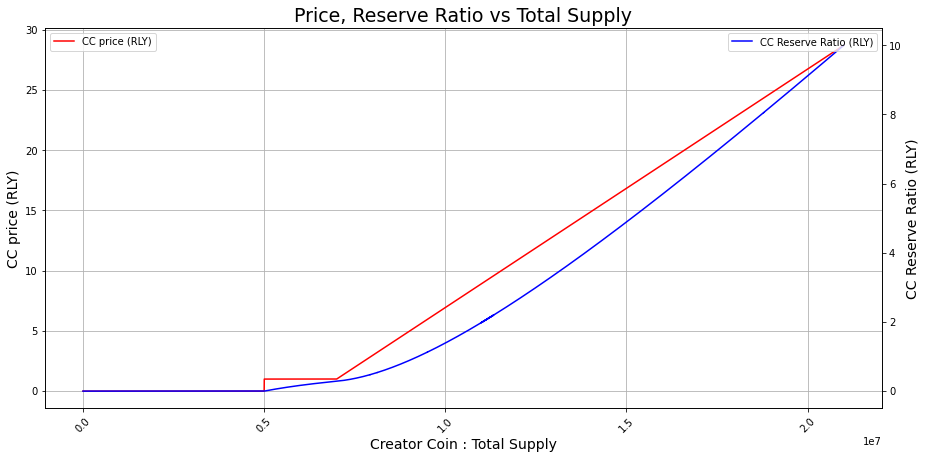

In [232]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Price, Reserve Ratio vs Total Supply',fontsize = 19)

ax.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],'-r',label="CC price (RLY)")
ax.set_xlabel("Creator Coin : Total Supply",fontsize=14)
ax.set_ylabel("CC price (RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],'-b',label="CC Reserve Ratio (RLY)")
ax2.set_ylabel("CC Reserve Ratio (RLY)",fontsize=14)
ax2.legend(loc='upper right')

In [233]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],label='CCs : Total Supply')
# plt.plot(metrics.loc[:,'RLY : Total Locked'],label='RLY : Total Locked')
# plt.xlabel('timestamps (simulated)',fontsize = 15)
# plt.ylabel('Total Supply (Millions)',fontsize = 15)
# plt.title('Total Creator Coins, RLY Locked vs Time',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_supplies_vs_time.png')

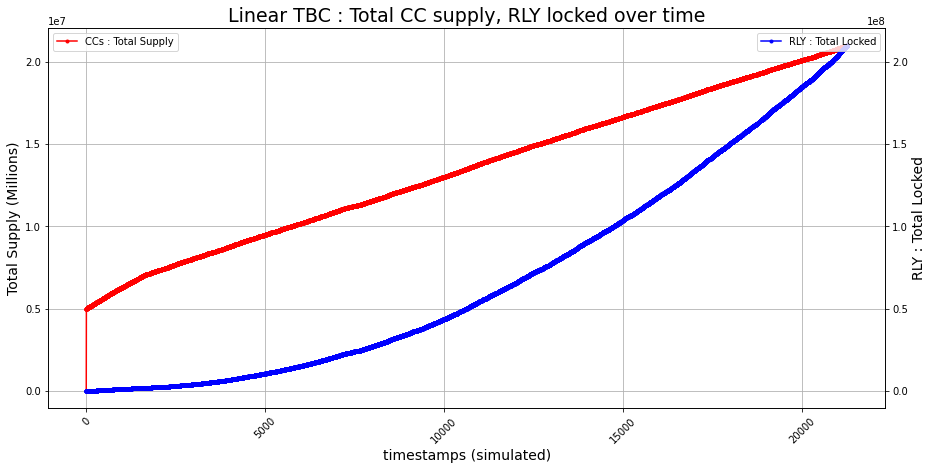

In [234]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : Total CC supply, RLY locked over time',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'], '-r',label="CCs : Total Supply", marker=".")
ax.set_xlabel("timestamps (simulated)",fontsize=14)
ax.set_ylabel("Total Supply (Millions)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['RLY : Total Locked'],'-b',label="RLY : Total Locked",marker=".")
ax2.set_ylabel("RLY : Total Locked",fontsize=14)
ax2.legend(loc='upper right')

In [235]:
# metrics[metrics['RLY : Total Locked'] >= 500000 ]

In [236]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: CCs Minted'],label='+2% depth: CCs Minted')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],label='+2% depth: RLY Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Delta Supply (Millions)',fontsize = 15)
# plt.title('+ 2% Market Depth : delta CCs minted, RLY Locked vs Total CC Supply',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_posDepthDeltaCC_RLY_vs_TotalCCSupply.png')

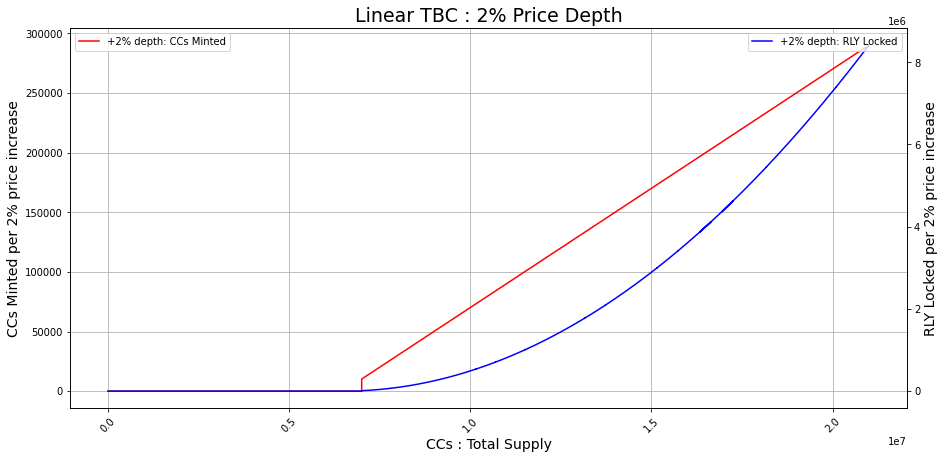

In [237]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : 2% Price Depth',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'],metrics['+2% depth: CCs Minted'], '-r',label="+2% depth: CCs Minted")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CCs Minted per 2% price increase",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],'-b',label="+2% depth: RLY Locked")
ax2.set_ylabel("RLY Locked per 2% price increase",fontsize=14)
ax2.legend(loc='upper right')

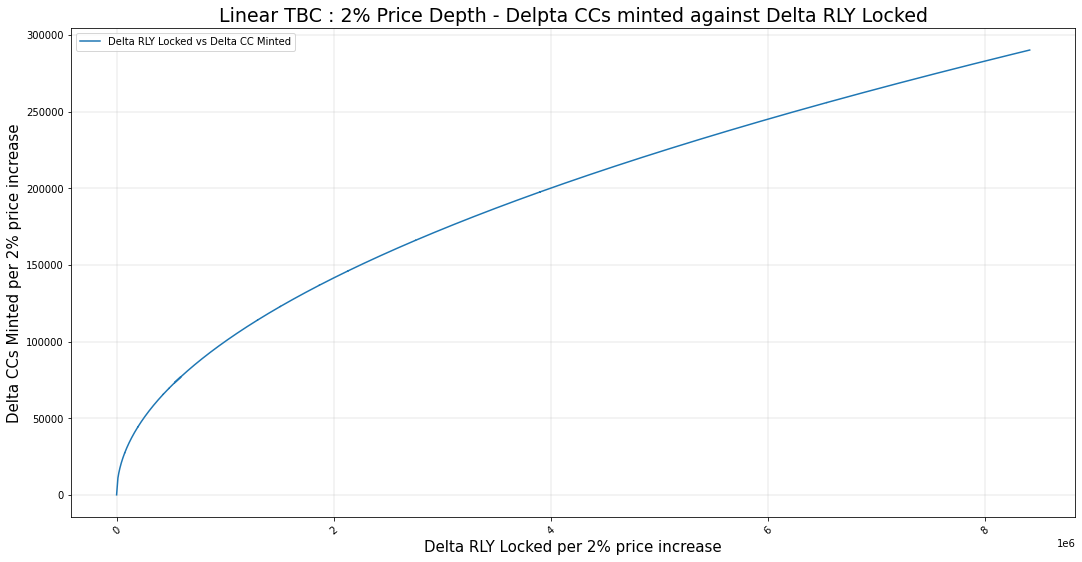

In [238]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=40)
plt.grid(linewidth=0.3)
plt.plot(metrics.loc[:,'+2% depth: RLY Locked'],metrics.loc[:,'+2% depth: CCs Minted'],label='Delta RLY Locked vs Delta CC Minted')

plt.xlabel('Delta RLY Locked per 2% price increase',fontsize = 15)
plt.ylabel('Delta CCs Minted per 2% price increase',fontsize = 15)
plt.title('Linear TBC : 2% Price Depth - Delpta CCs minted against Delta RLY Locked',fontsize = 19)
plt.legend()
# plt.savefig('./images/large_CC_TBC/1_posDepth_DeltaCC_vs_DeltaRLY.png')

In [239]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: CCs Burnt'],label='-2% depth: CCs Burnt')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],label='-2% depth: RLY Un-Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Delta Supply (Millions)',fontsize = 15)
# plt.title('- 2% Depth : delta CCs burnt, RLY Un-Locked vs Total CC Supply',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/1_negDepthDeltaCC_RLY_vs_TotalCCSupply.png')

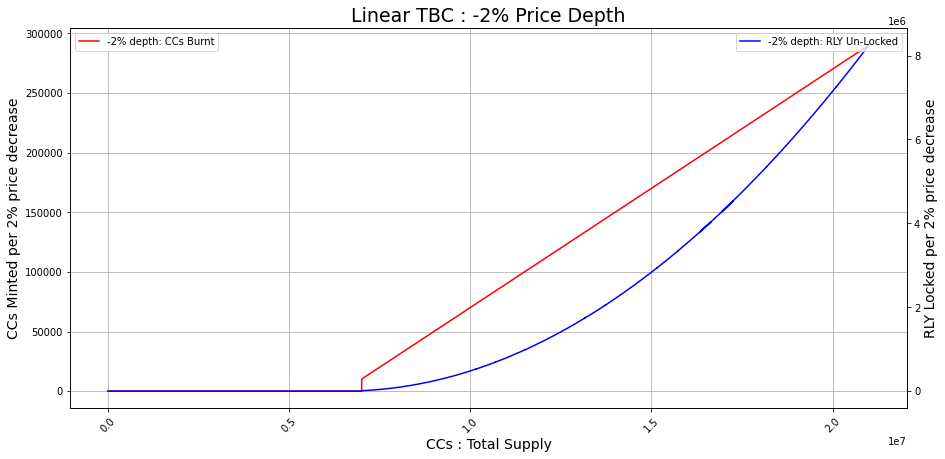

In [240]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : -2% Price Depth',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'],metrics['-2% depth: CCs Burnt'], '-r',label="-2% depth: CCs Burnt")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CCs Minted per 2% price decrease",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],'-b',label="-2% depth: RLY Un-Locked")
ax2.set_ylabel("RLY Locked per 2% price decrease",fontsize=14)
ax2.legend(loc='upper right')

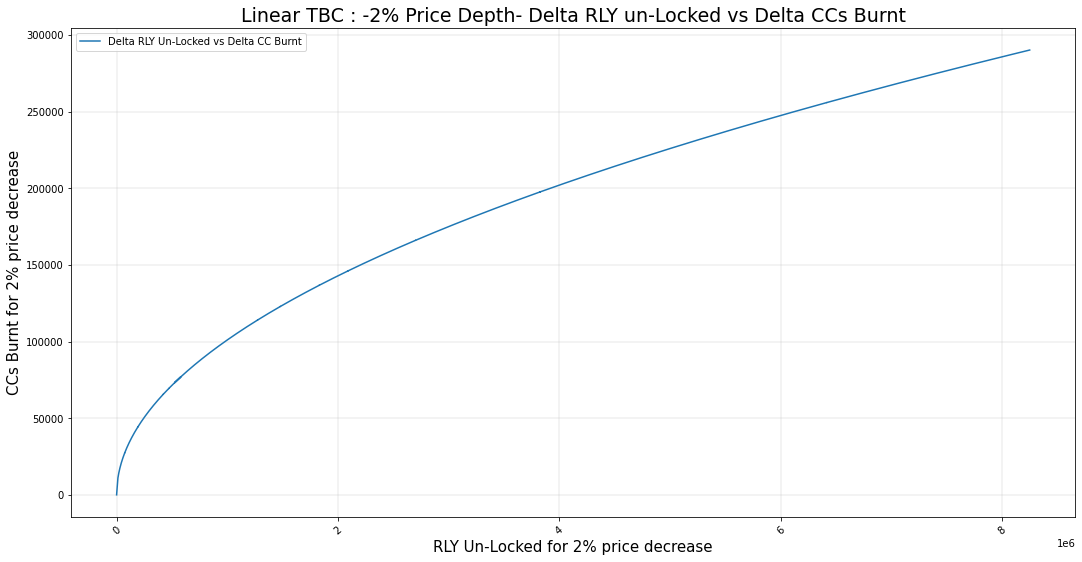

In [241]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=40)
plt.grid(linewidth=0.3)
plt.plot(metrics.loc[:,'-2% depth: RLY Un-Locked'],metrics.loc[:,'-2% depth: CCs Burnt'],label='Delta RLY Un-Locked vs Delta CC Burnt')

plt.xlabel('RLY Un-Locked for 2% price decrease',fontsize = 15)
plt.ylabel('CCs Burnt for 2% price decrease',fontsize = 15)
plt.title('Linear TBC : -2% Price Depth- Delta RLY un-Locked vs Delta CCs Burnt',fontsize = 19)
plt.legend()
# plt.savefig('./images/large_CC_TBC/1_negDepth_DeltaCC_vs_DeltaRLY.png')

In [262]:
# _5_perc_analysis_df

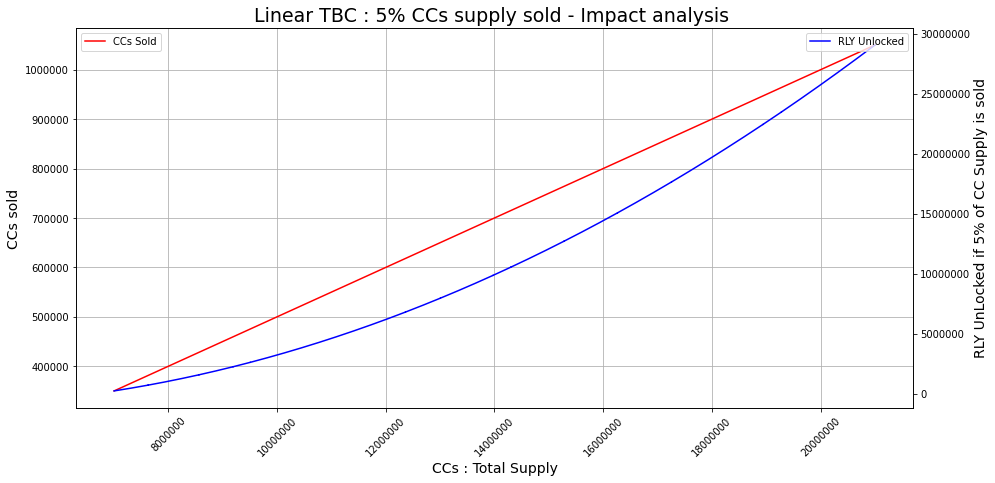

In [251]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : 5% CCs supply sold - Impact analysis ',fontsize = 19)

ax.plot( _5_perc_analysis_df['CCs : Total Supply'],_5_perc_analysis_df['5% CCs Sold'], '-r',label="CCs Sold")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CCs sold",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)
ax.ticklabel_format(useOffset=False, style='plain')

ax2=ax.twinx()
ax2.plot( _5_perc_analysis_df['CCs : Total Supply'],_5_perc_analysis_df.loc[:,'RLY Unlocked'],'-b',label="RLY Unlocked")
ax2.set_ylabel("RLY UnLocked if 5% of CC Supply is sold",fontsize=14)
ax2.legend(loc='upper right')
ax2.ticklabel_format(useOffset=False, style='plain')

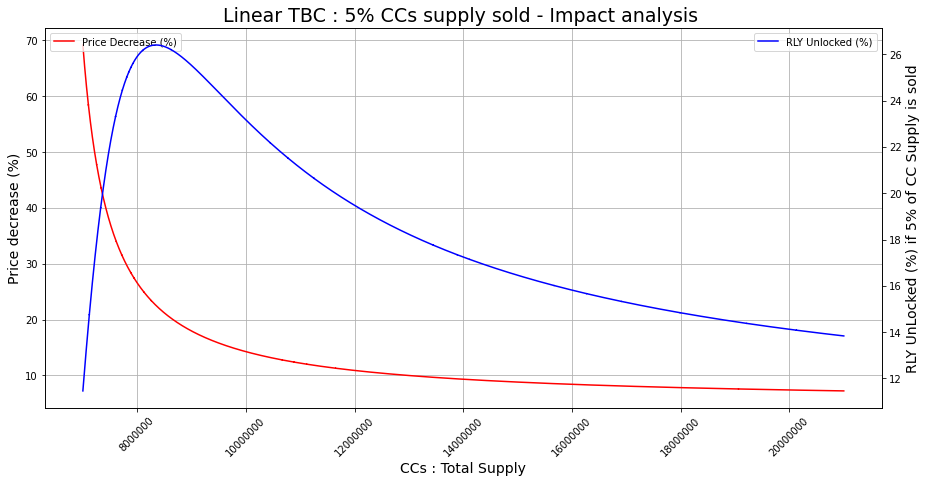

In [250]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : 5% CCs supply sold - Impact analysis ',fontsize = 19)

ax.plot( _5_perc_analysis_df['CCs : Total Supply'],_5_perc_analysis_df['Price Impact (%)'], '-r',label="Price Decrease (%)")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("Price decrease (%)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)
ax.ticklabel_format(useOffset=False, style='plain')

ax2=ax.twinx()
ax2.plot( _5_perc_analysis_df['CCs : Total Supply'],_5_perc_analysis_df.loc[:,'RLY Unlocked (%)'],'-b',label="RLY Unlocked (%)")
ax2.set_ylabel("RLY UnLocked (%) if 5% of CC Supply is sold",fontsize=14)
ax2.legend(loc='upper right')
ax2.ticklabel_format(useOffset=False, style='plain')

In [247]:
pd.options.display.float_format = '{:,.3f}'.format

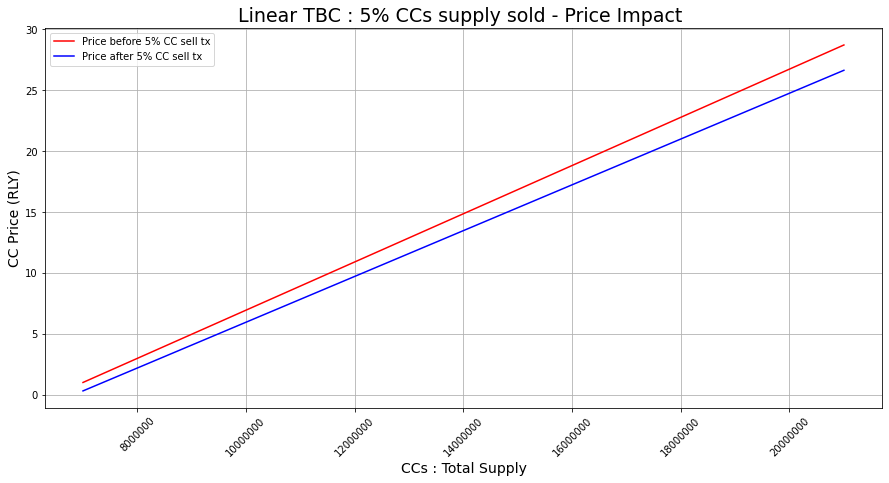

In [261]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : 5% CCs supply sold - Price Impact ',fontsize = 19)

ax.plot( _5_perc_analysis_df.loc[:,'CCs : Total Supply'],_5_perc_analysis_df.loc[:,'CCs : Price (RLY)'], '-r',label="Price before 5% CC sell tx")
ax.plot( _5_perc_analysis_df.loc[:,'CCs : Total Supply'],_5_perc_analysis_df.loc[:,'New Price'], '-b',label="Price after 5% CC sell tx")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CC Price (RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)
ax.ticklabel_format(useOffset=False, style='plain')

# ax2=ax.twinx()
# ax2.plot( _5_perc_analysis_df.loc[0:100,'CCs : Total Supply'],_5_perc_analysis_df.loc[0:100,'New Price'],'-b',label="Price after 5% CC sell tx")
# ax2.set_ylabel("Price after 5% CC sell tx",fontsize=14)
# ax2.legend(loc='upper right')
# ax2.ticklabel_format(useOffset=False, style='plain')

In [185]:
def num(x):
    f = round(x / 1000000,2)
    st = str(f) + ' M'
    return st

In [ ]:
# display(df)
metrics = df

In [ ]:
aggregatedDF = pd.DataFrame([], columns = ['Range','CC minted (prev)','CC minted (new)','Delta RLY Locked']) 
CCminted = 0
i = 0 

depthFigures = pd.DataFrame([], columns = ['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']) 

while CCminted < 21000000:
    cur_CC = 0
    RLY_locked_window = 0
    
    while cur_CC < 1000000 and i < len(metrics.index): 
        cur_CC = cur_CC + metrics.loc[i,'CCs : Delta Supply']
        RLY_locked_window = RLY_locked_window + metrics.loc[i,'RLY : Delta Locked'] 
        i = i + 1
#         print( 'current CCs = ' + str(round(cur_CC,2)) + ' RLY locked window = ' + str(round(RLY_locked_window,2)) + ' i = ' + str(i) )
        
    aggregatedDF.loc[len(aggregatedDF.index)] = [num(CCminted) + ' - ' + num(CCminted + cur_CC),CCminted,CCminted + cur_CC, RLY_locked_window]
#     aggregatedDF.loc[len(aggregatedDF.index)] = [str(round(CCminted,2)) + '-' + str(round(CCminted + cur_CC,2)),CCminted,CCminted + cur_CC, RLY_locked_window]
    
    if i >= len(metrics.index):
        i = i - 1
        
    depthFigures.loc[len(depthFigures.index)] = metrics.loc[i,['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']]
    
    CCminted = CCminted + cur_CC   
    
depthFigures.loc[len(depthFigures.index)] = metrics.loc[len(metrics.index) - 1,['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']]    
    
    

In [ ]:
fig = aggregatedDF.plot.bar(x='Range',y='Delta RLY Locked',xlabel='CCs Minted (Range)',

                            ylabel='Delta RLY Locked (scale = 10 Million)', figsize=(12,9) ).get_figure()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
display(depthFigures)

In [ ]:
depthFigures.loc[len(depthFigures.index)] = metrics.loc[len(metrics.index) - 1,['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']]    

In [ ]:
# fig.savefig('./images/large_CC_TBC/1_delta_RLY_locked_perMillionCC.png')

In [ ]:
# display(df)

# TBC Template #2 : Linear curve for pre-sale and market maturity phase

Brief description of different market phases supported by this template are mentioned below -

![TBC Template #2 : Linear curve for pre-sale and market maturity phase](./curves/template2.png)

- Genesis Mint : CCs minted against minimal RLY locked
- Pre-Sale - Liquidity provided by a linear exchange pricing function, y = m*x + c
- Market Maturity - Liquidity provided by an exchange pricing function, y = m*x + c

The max supply of Creator Coins that can be minted is capped.

In [ ]:
# Parameters
total_CC_Supply = 21000000            # 21 Million
RLY_total_locked_target = 210000000   # 210 Million

genesis_supply = 5000000 # 5 Million
totalRallyLocked = 0    

# Pre-Sale Parameters
_CCsSold_presale = 2000000  # 2 Million
_RLY_Locked_presale = 2000000 # 2 Million

In [ ]:
df = pd.DataFrame([], columns = ['date', 'timestamp','slope','CC To be Minted','RLY To be Locked',
                                 'CCs : Price (RLY)','CCs : Delta Supply','CCs : Total Supply',
                                 'RLY : Delta Locked','RLY : Total Locked',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio','Note']) 
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')

unix = datetime(1970, 1, 1)
cur_  = datetime(2021, 1, 1)

deltaTime = timedelta(minutes=1)

##### Adding first row (Phase 0)

In [ ]:
df.loc[0] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),0,total_CC_Supply,RLY_total_locked_target
                         ,0,0,0,0,0,0,0,0,0,0, 'Phase 0']

In [ ]:
# display(df)

## Genesis Supply

In [ ]:
gen_percent_of_total = genesis_supply/total_CC_Supply * 100
print('Genesis Supply = ',genesis_supply,' CCs, which equals ',
      round(gen_percent_of_total,2),'% of the total CCs supply cap of '      ,total_CC_Supply )

##### Adding 2nd row : State after Genesis Mint

In [ ]:
cur_ = cur_ + deltaTime
df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                         0,total_CC_Supply - genesis_supply,RLY_total_locked_target,0,genesis_supply,genesis_supply,0,0,0,0,0,0,0,'Genesis Mint']

In [ ]:
# display(df)

## Pre-Sale

In [ ]:
finalPrice_presale = 2*(_RLY_Locked_presale)/(_CCsSold_presale)

slope1 = finalPrice_presale / _CCsSold_presale

constant1 = -1 * genesis_supply * slope1

print('Exchange pricing function for CC pre-sale : CC price (RLY) = ' + str(slope1) + ' * CCs Supply ' + str(constant1) )

print('\nTotal CCs sold during pre-sale = ' + str(_CCsSold_presale) )
print('Total RLY bonded to the TBC during pre-sale = ' + str(_RLY_Locked_presale) )
print('CC price after the pre-sale = ' + str(finalPrice_presale) + ' RLY')

##### Adding State after Pre-Sale

In [ ]:
def costOfMinting(c,slope,prevCCSupply,newCCSupply): 
    # integral of m*x + c
    dif = c*(newCCSupply - prevCCSupply) + 0.5*slope*(pow(newCCSupply,2)-pow(prevCCSupply,2)) 
    return dif

In [ ]:
currentSold = 100
deltaSupplies = getNormalDistributionValues(700, 1000,1000)
 
while currentSold < _CCsSold_presale: 
    cur_ = cur_ + deltaTime
    slope = slope1
    constant = constant1

    if i < 1000:
        if i > 0:
            CC_deltaSupply = deltaSupplies[i]
        i = i + 1
    else :
        deltaSupplies = getNormalDistributionValues(700, 1000,1000)
        i = 0
        CC_deltaSupply = deltaSupplies[i]
        
    total_CCs_to_be_minted = df.loc[len(df.index)-1,'CC To be Minted'] - CC_deltaSupply
    CC_totalSupply = df.loc[len(df.index)-1,'CCs : Total Supply'] + CC_deltaSupply
    
    # functional calculation      
    CC_price_RLY = slope*CC_totalSupply + constant
    mintCost_RLY = costOfMinting(constant,slope,df.loc[len(df.index)-1,'CCs : Total Supply'],CC_totalSupply)
    
    pos_depth_CC_minted = CC_price_RLY * 0.02 / slope
    pos_depth_RLY_locked = costOfMinting(constant,slope,CC_totalSupply, CC_totalSupply + pos_depth_CC_minted)
    neg_depth_CC_burnt = CC_price_RLY * 0.02 / slope
    neg_depth_RLY_unlocked = -1 * costOfMinting(constant,slope,CC_totalSupply, CC_totalSupply - neg_depth_CC_burnt)
    
    
#     print(str(CC_totalSupply) + ' ' + str(CC_price_RLY) + ' ' + str(mintCost_RLY))
    
    currentSold = currentSold + CC_deltaSupply
    
    RLY_DeltaLocked = mintCost_RLY # CC_deltaSupply * CC_price_RLY
    RLY_TotalLocked = df.loc[len(df.index)-1,'RLY : Total Locked'] + RLY_DeltaLocked
    total_RLY_to_be_locked = df.loc[len(df.index)-1,'RLY To be Locked'] - RLY_DeltaLocked
    reserve_ratio = RLY_TotalLocked / CC_totalSupply
    slope = 0

    note = str(CC_deltaSupply) + ' CCs sold for ' + str(RLY_DeltaLocked) + ' RLY'

    df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                             slope,total_CCs_to_be_minted,total_RLY_to_be_locked, CC_price_RLY, CC_deltaSupply, CC_totalSupply,
                             RLY_DeltaLocked,RLY_TotalLocked,pos_depth_CC_minted,pos_depth_RLY_locked,neg_depth_CC_burnt,neg_depth_RLY_unlocked,reserve_ratio,note]


In [ ]:
# display(df)
metrics = df

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],label='CC price vs total CC supply')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],label='CC Reserve Ratio vs total CC supply')
# plt.xlabel('Creator Coin : Total Supply (scale = 10 Million)',fontsize = 15)
# plt.ylabel('Creator Coin : Price (RLY)',fontsize = 15)
# plt.title('Price, Reserve Ratio vs Total Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_presale_Price_Reserve_Ratio_vs_Supply_PRESALE.png')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Price, Reserve Ratio vs Total Supply : Pre Sales',fontsize = 19)

ax.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],'-r',label="CC price (RLY)")
ax.set_xlabel("Creator Coin : Total Supply",fontsize=14)
ax.set_ylabel("CC price (RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],'-b',label="CC Reserve Ratio (RLY)")
ax2.set_ylabel("CC Reserve Ratio (RLY)",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],label='CCs : Total Supply')
# plt.plot(metrics.loc[:,'RLY : Total Locked'],label='RLY : Total Locked')
# plt.xlabel('timestamps (simulated)',fontsize = 15)
# plt.ylabel('Total Supply (Millions)',fontsize = 15)
# plt.title('Total Creator Coins, RLY Locked vs Time (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_supplies_vs_time_PRESALE.png')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Total Creator Coins, RLY Locked vs Time : Pre sale',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'], '-r',label="CCs : Total Supply", marker=".")
ax.set_xlabel("timestamps (simulated)",fontsize=14)
ax.set_ylabel("Total Supply (Millions)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['RLY : Total Locked'],'-b',label="RLY : Total Locked",marker=".")
ax2.set_ylabel("RLY : Total Locked",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: CCs Minted'],label='+2% depth: CCs Minted')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],label='+2% depth: RLY Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Delta Supply',fontsize = 15)
# plt.title('+ 2% Market Depth : delta CCs minted, RLY Locked vs Total CC Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_posDepthDeltaCC_RLY_vs_TotalCCSupply_PRESALE.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'+2% depth: RLY Locked'],metrics.loc[:,'+2% depth: CCs Minted'],label='Delta RLY Locked vs Delta CC Minted')

# plt.xlabel('Delta RLY Locked for +2% depth',fontsize = 15)
# plt.ylabel('Delta CCs Minted for +2% depth',fontsize = 15)
# plt.title('+2% depth : Delta RLY Locked vs Delta CCs Minted (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_posDepth_DeltaCC_vs_DeltaRLY_PRESALE.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: CCs Burnt'],label='-2% depth: CCs Burnt')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],label='-2% depth: RLY Un-Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Total Supply (Millions)',fontsize = 15)
# plt.title('- 2% Depth : delta CCs burnt, RLY Un-Locked vs Total CC Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_negDepthDeltaCC_RLY_vs_TotalCCSupply_PRESALE.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'-2% depth: RLY Un-Locked'],metrics.loc[:,'-2% depth: CCs Burnt'],label='Delta RLY Un-Locked vs Delta CC Burnt')

# plt.xlabel('RLY Un-Locked for -2% depth',fontsize = 15)
# plt.ylabel('CCs Burnt for -2% depth',fontsize = 15)
# plt.title('-2% depth : Delta RLY un-Locked vs Delta CCs Burnt (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_negDepth_DeltaCC_vs_DeltaRLY_PRESALE.png')

## Market Maturity : Automated Liquidity via the Bonding Curve

- CCs ca be bought / sold via the Bonding Curve.
    y = mx + c

In [ ]:
CC_finalPrice = 2 * ( ( df.loc[len(df.index)-1,'RLY To be Locked'] / df.loc[len(df.index)-1,'CC To be Minted'] ) - 0.5 * df.loc[len(df.index)-1,'CCs : Price (RLY)'] )

slope2 = ( CC_finalPrice -  df.loc[len(df.index)-1,'CCs : Price (RLY)'] ) / df.loc[len(df.index)-1,'CC To be Minted'] 
constant2 = df.loc[len(df.index)-1,'CCs : Price (RLY)'] - slope2*df.loc[len(df.index)-1,'CCs : Total Supply']

print('Exchange pricing function for CC Market Maturity phase : CC price (RLY) = ' + str(slope2) + ' * CCs Supply ' + str(constant2) )

print('\nTotal CCs sold during Market Maturity phase = ' + str(df.loc[len(df.index)-1,'CC To be Minted']) )
print('Total RLY bonded to the TBC during Market Maturity phase = ' + str(df.loc[len(df.index)-1,'RLY To be Locked']) )
print('Final CC price : ' + str(CC_finalPrice) + ' RLY')

In [ ]:
def costOfMinting(c,slope,prevCCSupply,newCCSupply): 
    # integral of m*x + c
    dif = c*(newCCSupply - prevCCSupply) + 0.5*slope*(pow(newCCSupply,2)-pow(prevCCSupply,2)) 
    return dif

In [ ]:
deltaSupplies = getNormalDistributionValues(700, 1000,1000)
CCstobeMinted = df.loc[len(df.index)-1,'CC To be Minted']
    
while CCstobeMinted > 0:
    cur_ = cur_ + deltaTime  # date updated

    if i < 1000:
        CC_deltaSupply = deltaSupplies[i]
        i = i + 1
    else :
        deltaSupplies = getNormalDistributionValues(700, 1000,1000)
        i = 0
        CC_deltaSupply = deltaSupplies[i]

    total_CCs_to_be_minted = df.loc[len(df.index)-1,'CC To be Minted'] - CC_deltaSupply
    CC_totalSupply = df.loc[len(df.index)-1,'CCs : Total Supply'] + CC_deltaSupply
                
    # functional calculation      
    CC_price_RLY = slope2*CC_totalSupply + constant2
    mintCost_RLY = costOfMinting(constant2,slope2,df.loc[len(df.index)-1,'CCs : Total Supply'],CC_totalSupply)

    pos_depth_CC_minted = CC_price_RLY * 0.02 / slope2
    pos_depth_RLY_locked = costOfMinting(constant2,slope2,CC_totalSupply, CC_totalSupply + pos_depth_CC_minted)
    neg_depth_CC_burnt = CC_price_RLY * 0.02 / slope2
    neg_depth_RLY_unlocked = -1 * costOfMinting(constant2,slope2,CC_totalSupply, CC_totalSupply - neg_depth_CC_burnt)
        
    RLY_DeltaLocked = mintCost_RLY
    RLY_TotalLocked = df.loc[len(df.index)-1,'RLY : Total Locked'] + RLY_DeltaLocked
    total_RLY_to_be_locked = df.loc[len(df.index)-1,'RLY To be Locked'] - RLY_DeltaLocked
    reserve_ratio = RLY_TotalLocked / CC_totalSupply
    
    note = 'Mint Transaction'

    df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                             slope2,total_CCs_to_be_minted,total_RLY_to_be_locked, CC_price_RLY, CC_deltaSupply, CC_totalSupply,
                             RLY_DeltaLocked,RLY_TotalLocked,pos_depth_CC_minted,pos_depth_RLY_locked,neg_depth_CC_burnt,neg_depth_RLY_unlocked,
                             reserve_ratio,note]
    
    CCstobeMinted = df.loc[len(df.index)-1,'CC To be Minted']

In [ ]:
# display(df)
metrics = df

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Price, Reserve Ratio vs Total Supply',fontsize = 19)

ax.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],'-r',label="CC price (RLY)")
ax.set_xlabel("Creator Coin : Total Supply",fontsize=14)
ax.set_ylabel("CC price (RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],'-b',label="CC Reserve Ratio (RLY)")
ax2.set_ylabel("CC Reserve Ratio (RLY)",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],label='CC price vs total CC supply')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],label='CC Reserve Ratio vs total CC supply')
# plt.xlabel('Creator Coin : Total Supply (scale = 10 Million)',fontsize = 15)
# plt.ylabel('Creator Coin : Price (RLY)',fontsize = 15)
# plt.title('Price, Reserve Ratio vs Total Supply',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_Price_Reserve_Ratio_vs_Supply.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],label='CCs : Total Supply')
# plt.plot(metrics.loc[:,'RLY : Total Locked'],label='RLY : Total Locked')
# plt.xlabel('timestamps (simulated)',fontsize = 15)
# plt.ylabel('Total Supply (Millions)',fontsize = 15)
# plt.title('Total Creator Coins, RLY Locked vs Time',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_supplies_vs_time.png')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Total Creator Coins, RLY Locked vs Time',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'], '-r',label="CCs : Total Supply", marker=".")
ax.set_xlabel("timestamps (simulated)",fontsize=14)
ax.set_ylabel("Total Supply (Millions)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['RLY : Total Locked'],'-b',label="RLY : Total Locked",marker=".")
ax2.set_ylabel("RLY : Total Locked",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : 2% Price Depth',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'],metrics['+2% depth: CCs Minted'], '-r',label="+2% depth: CCs Minted")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CCs Minted per 2% price increase",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],'-b',label="+2% depth: RLY Locked")
ax2.set_ylabel("RLY Locked per 2% price increase",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: CCs Minted'],label='+2% depth: CCs Minted')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],label='+2% depth: RLY Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Delta Supply (Millions)',fontsize = 15)
# plt.title('+ 2% Market Depth : delta CCs minted, RLY Locked vs Total CC Supply',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_posDepthDeltaCC_RLY_vs_TotalCCSupply.png')

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=40)
plt.grid(linewidth=0.3)
plt.plot(metrics.loc[:,'+2% depth: RLY Locked'],metrics.loc[:,'+2% depth: CCs Minted'],label='Delta RLY Locked vs Delta CC Minted')

plt.xlabel('Delta RLY Locked for +2% depth',fontsize = 15)
plt.ylabel('Delta CCs Minted for +2% depth',fontsize = 15)
plt.title('+2% depth : Delta RLY Locked vs Delta CCs Minted',fontsize = 19)
plt.legend()
# plt.savefig('./images/large_CC_TBC/2_posDepth_DeltaCC_vs_DeltaRLY.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: CCs Burnt'],label='-2% depth: CCs Burnt')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],label='-2% depth: RLY Un-Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Delta Supply (Millions)',fontsize = 15)
# plt.title('- 2% Depth : delta CCs burnt, RLY Un-Locked vs Total CC Supply',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/2_negDepthDeltaCC_RLY_vs_TotalCCSupply.png')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : -2% Price Depth',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'],metrics['-2% depth: CCs Burnt'], '-r',label="-2% depth: CCs Burnt")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CCs Burnt per 2% price decrease",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],'-b',label="-2% depth: RLY Un-Locked")
ax2.set_ylabel("RLY UnLocked per 2% price decrease",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=40)
plt.grid(linewidth=0.3)
plt.plot(metrics.loc[:,'-2% depth: RLY Un-Locked'],metrics.loc[:,'-2% depth: CCs Burnt'],label='Delta RLY Un-Locked vs Delta CC Burnt')

plt.xlabel('RLY Un-Locked for -2% depth',fontsize = 15)
plt.ylabel('CCs Burnt for -2% depth',fontsize = 15)
plt.title('-2% depth : Delta RLY un-Locked vs Delta CCs Burnt',fontsize = 19)
plt.legend()
# plt.savefig('./images/large_CC_TBC/2_negDepth_DeltaCC_vs_DeltaRLY.png')

In [ ]:
# display(df)

In [ ]:
aggregatedDF = pd.DataFrame([], columns = ['Range','CC minted (prev)','CC minted (new)','Delta RLY Locked']) 
CCminted = 0
i = 0 

depthFigures = pd.DataFrame([], columns = ['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']) 

while CCminted < 21000000 and i < (len(metrics.index) - 1):
    cur_CC = 0
    RLY_locked_window = 0
    
    while cur_CC < 1000000 and i < (len(metrics.index) - 1): 
        cur_CC = cur_CC + metrics.loc[i,'CCs : Delta Supply']
        RLY_locked_window = RLY_locked_window + metrics.loc[i,'RLY : Delta Locked'] 
        i = i + 1
#         print( 'current CCs = ' + str(round(cur_CC,2)) + ' RLY locked window = ' + str(round(RLY_locked_window,2)) + ' i = ' + str(i) )
        
    aggregatedDF.loc[len(aggregatedDF.index)] = [str(round(CCminted,2)) + '-' + str(round(CCminted + cur_CC,2)),CCminted,CCminted + cur_CC, RLY_locked_window]

    depthFigures.loc[len(depthFigures.index)] = metrics.loc[i,['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']]
    
    CCminted = CCminted + cur_CC   
    
depthFigures.loc[len(depthFigures.index)] = metrics.loc[len(metrics.index) - 1,['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']]    
    
    

In [ ]:
fig = aggregatedDF.plot.bar(x='Range',y='Delta RLY Locked',xlabel='CCs Minted (Range)',
                      ylabel='Delta RLY Locked (scale = 10 Million)', figsize=(12,9) ).get_figure()

In [ ]:
# fig.savefig('./images/large_CC_TBC/2_delta_RLY_locked_perMillionCC.png')

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
display(depthFigures)

# TBC Template #3 : Negative Exponential curve for pre-sale and linear curve for market maturity phase

Brief description of different market phases supported by this template are mentioned below -

![TBC Template #3 : Logarithmic curve for pre-sale and linear curve for market maturity phase](./curves/template3.png)

- Genesis Mint : CCs minted against minimal RLY locked
- Pre-Sale - Liquidity provided by a logarithmic exchange pricing function, price = C1 + C2*log(x) 
- Market Maturity - Liquidity provided by an exchange pricing function, y = m*x + c

The max supply of Creator Coins that can be minted is capped.

In [ ]:
# Parameters
total_CC_Supply = 21000000            # 21 Million
RLY_total_locked_target = 210000000   # 210 Million

genesis_supply = 5000000 # 5 Million
totalRallyLocked = 0    

# Pre-Sale Parameters
_CCsSold_presale = 2000000  # 2 Million
_CCPreSalePrice_Final = 2

In [ ]:
df = pd.DataFrame([], columns = ['date', 'timestamp','slope','CC To be Minted','RLY To be Locked',
                                 'CCs : Price (RLY)','CCs : Delta Supply','CCs : Total Supply',
                                 'RLY : Delta Locked','RLY : Total Locked',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio','Note']) 
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y')

unix = datetime(1970, 1, 1)
cur_  = datetime(2021, 1, 1)

deltaTime = timedelta(minutes=1)

##### Adding first row (Phase 0)

In [ ]:
df.loc[0] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),0,total_CC_Supply,RLY_total_locked_target
                         ,0,0,0,0,0,0,0,0,0,0, 'Phase 0']

In [ ]:
# display(df)

## Genesis Supply

In [ ]:
gen_percent_of_total = genesis_supply/total_CC_Supply * 100
print('Genesis Supply = ',genesis_supply,' CCs, which equals ',
      round(gen_percent_of_total,2),'% of the total CCs supply cap of '      ,total_CC_Supply )

##### Adding 2nd row : State after Genesis Mint

In [ ]:
cur_ = cur_ + deltaTime
df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                         0,total_CC_Supply - genesis_supply,RLY_total_locked_target,0,genesis_supply,genesis_supply,0,0,0,0,0,0,0,'Genesis Mint']

In [ ]:
# display(df)

## Pre-Sale

In [ ]:
finalPrice_presale = _CCPreSalePrice_Final
multiplier = 1

constant2 = round(finalPrice_presale / (math.log((genesis_supply + _CCsSold_presale)/genesis_supply)),3)
constant1 = round(-1 * constant2 * math.log(multiplier*genesis_supply),3)

finalCCSupplyPresale = genesis_supply + _CCsSold_presale

print('Exchange pricing function for CC pre-sale : CC price (RLY) = ' + str(constant1) + ' + ' + str(constant2) + ' * log ( ' + str(multiplier) + '* CCs Supply ) ')
print('\nTotal CCs sold during pre-sale = ' + str(_CCsSold_presale) )

totalRLYLockedDuringPreSale = constant1*(_CCsSold_presale) + constant2*( math.log(multiplier)*_CCsSold_presale +  finalCCSupplyPresale*math.log(finalCCSupplyPresale) - finalCCSupplyPresale - (genesis_supply*math.log(genesis_supply) - genesis_supply) )

print('Total RLY bonded to the TBC during pre-sale = ' + str(totalRLYLockedDuringPreSale) )
print('CC price after the pre-sale = ' + str(finalPrice_presale) + ' RLY')

##### Adding State during Pre-Sale

In [ ]:
def costOfMinting(c1,c2,preCCSupply,newCCSupply): 
    # integral of c1 + c2*log(x)
    dif = c1*(newCCSupply - preCCSupply) + c2*( (math.log(multiplier)*(newCCSupply - preCCSupply)) + (newCCSupply*math.log(newCCSupply)) - newCCSupply - ((preCCSupply*math.log(preCCSupply)) - preCCSupply) )
    return dif

In [ ]:
def posDepth_CCminted(c1,c2,CCSupply,CCPrice):
    exp = ((0.02*CCPrice)/c2) + math.log(multiplier*CCSupply)
    ccMinted = ((math.exp(exp))/multiplier) - CCSupply
    return ccMinted
    

In [ ]:
def negDepth_CCBurnt(c1,c2,CCSupply,CCPrice):
    exp = math.log(multiplier*CCSupply) - ((0.02*CCPrice)/c2)
    ccBurnt = CCSupply - ((math.exp(exp))/multiplier)
    return ccBurnt

In [ ]:
currentSold = 100
deltaSupplies = getNormalDistributionValues(700, 1000,1000)

while currentSold < _CCsSold_presale: 
    cur_ = cur_ + deltaTime

    if i < 1000:
        if deltaSupplies[i] > 0 :
            CC_deltaSupply = deltaSupplies[i]        
        i = i + 1
    else :
        deltaSupplies = getNormalDistributionValues(700, 1000,1000)
        i = 0
        CC_deltaSupply = deltaSupplies[i]
        
    total_CCs_to_be_minted = df.loc[len(df.index)-1,'CC To be Minted'] - CC_deltaSupply
    CC_totalSupply = df.loc[len(df.index)-1,'CCs : Total Supply'] + CC_deltaSupply
    
    # functional calculation      
    CC_price_RLY = constant1 + constant2*math.log(multiplier*CC_totalSupply)
    mintCost_RLY = costOfMinting(constant1,constant2,df.loc[len(df.index)-1,'CCs : Total Supply'],CC_totalSupply)
    
    pos_depth_CC_minted = posDepth_CCminted(constant1,constant2,CC_totalSupply,CC_price_RLY)
    pos_depth_RLY_locked = costOfMinting(constant1,constant2,CC_totalSupply, CC_totalSupply + pos_depth_CC_minted)
    neg_depth_CC_burnt = negDepth_CCBurnt(constant1,constant2,CC_totalSupply,CC_price_RLY)
    neg_depth_RLY_unlocked = -1 * costOfMinting(constant1,constant2,CC_totalSupply, CC_totalSupply - neg_depth_CC_burnt)
        
    currentSold = currentSold + CC_deltaSupply
    
    RLY_DeltaLocked = mintCost_RLY # CC_deltaSupply * CC_price_RLY
    RLY_TotalLocked = df.loc[len(df.index)-1,'RLY : Total Locked'] + RLY_DeltaLocked
    total_RLY_to_be_locked = df.loc[len(df.index)-1,'RLY To be Locked'] - RLY_DeltaLocked
    reserve_ratio = RLY_TotalLocked / CC_totalSupply
    slope = 0

    note = str(CC_deltaSupply) + ' CCs sold for ' + str(RLY_DeltaLocked) + ' RLY'

    df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                             slope,total_CCs_to_be_minted,total_RLY_to_be_locked, CC_price_RLY, CC_deltaSupply, CC_totalSupply,
                             RLY_DeltaLocked,RLY_TotalLocked,pos_depth_CC_minted,pos_depth_RLY_locked,neg_depth_CC_burnt,neg_depth_RLY_unlocked,reserve_ratio,note]


In [ ]:
# display(df)
metrics = df

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],label='CC price vs total CC supply')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],label='CC Reserve Ratio vs total CC supply')
# plt.xlabel('Creator Coin : Total Supply (scale = 10 Million)',fontsize = 15)
# plt.ylabel('Creator Coin : Price (RLY)',fontsize = 15)
# plt.title('Price, Reserve Ratio vs Total Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/3_presale_Price_Reserve_Ratio_vs_Supply_PRESALE.png')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Price, Reserve Ratio vs Total Supply: Presale',fontsize = 19)

ax.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],'-r',label="CC price (RLY)")
ax.set_xlabel("Creator Coin : Total Supply",fontsize=14)
ax.set_ylabel("CC price (RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],'-b',label="CC Reserve Ratio (RLY)")
ax2.set_ylabel("CC Reserve Ratio (RLY)",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Total Creator Coins, RLY Locked vs Time: Presale',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'], '-r',label="CCs : Total Supply", marker=".")
ax.set_xlabel("timestamps (simulated)",fontsize=14)
ax.set_ylabel("Total Supply (Millions)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['RLY : Total Locked'],'-b',label="RLY : Total Locked",marker=".")
ax2.set_ylabel("RLY : Total Locked",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: CCs Minted'],label='+2% depth: CCs Minted')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],label='+2% depth: RLY Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Delta Supply',fontsize = 15)
# plt.title('+ 2% Market Depth : delta CCs minted, RLY Locked vs Total CC Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/3_posDepthDeltaCC_RLY_vs_TotalCCSupply_PRESALE.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'+2% depth: RLY Locked'],metrics.loc[:,'+2% depth: CCs Minted'],label='Delta RLY Locked vs Delta CC Minted')

# plt.xlabel('Delta RLY Locked for +2% depth',fontsize = 15)
# plt.ylabel('Delta CCs Minted for +2% depth',fontsize = 15)
# plt.title('+2% depth : Delta RLY Locked vs Delta CCs Minted (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/3_posDepth_DeltaCC_vs_DeltaRLY_PRESALE.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: CCs Burnt'],label='-2% depth: CCs Burnt')
# plt.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],label='-2% depth: RLY Un-Locked')

# plt.xlabel('CCs : Total Supply',fontsize = 15)
# plt.ylabel('Total Supply (Millions)',fontsize = 15)
# plt.title('- 2% Depth : delta CCs burnt, RLY Un-Locked vs Total CC Supply (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/3_negDepthDeltaCC_RLY_vs_TotalCCSupply_PRESALE.png')

In [ ]:
# plt.figure(figsize=(18,9))
# plt.xticks(rotation=40)
# plt.grid(linewidth=0.3)
# plt.plot(metrics.loc[:,'-2% depth: RLY Un-Locked'],metrics.loc[:,'-2% depth: CCs Burnt'],label='Delta RLY Un-Locked vs Delta CC Burnt')

# plt.xlabel('RLY Un-Locked for -2% depth',fontsize = 15)
# plt.ylabel('CCs Burnt for -2% depth',fontsize = 15)
# plt.title('-2% depth : Delta RLY un-Locked vs Delta CCs Burnt (CC PRE SALE)',fontsize = 19)
# plt.legend()
# plt.savefig('./images/large_CC_TBC/3_negDepth_DeltaCC_vs_DeltaRLY_PRESALE.png')

## Market Maturity : Automated Liquidity via the Bonding Curve

- CCs ca be bought / sold via the Bonding Curve.
    y = mx + c

In [ ]:
CC_finalPrice = 2 * ( ( df.loc[len(df.index)-1,'RLY To be Locked'] / df.loc[len(df.index)-1,'CC To be Minted'] ) - 0.5 * df.loc[len(df.index)-1,'CCs : Price (RLY)'] )

slope2 = ( CC_finalPrice -  df.loc[len(df.index)-1,'CCs : Price (RLY)'] ) / df.loc[len(df.index)-1,'CC To be Minted'] 
constant2 = df.loc[len(df.index)-1,'CCs : Price (RLY)'] - slope2*df.loc[len(df.index)-1,'CCs : Total Supply']

print('Exchange pricing function for CC Market Maturity phase : CC price (RLY) = ' + str(slope2) + ' * CCs Supply ' + str(constant2) )

print('\nTotal CCs sold during Market Maturity phase = ' + str(df.loc[len(df.index)-1,'CC To be Minted']) )
print('Total RLY bonded to the TBC during Market Maturity phase = ' + str(df.loc[len(df.index)-1,'RLY To be Locked']) )
print('Final CC price : ' + str(CC_finalPrice) + ' RLY')

In [ ]:
def costOfMinting(c,slope,prevCCSupply,newCCSupply): 
    # integral of m*x + c
    dif = c*(newCCSupply - prevCCSupply) + 0.5*slope*(pow(newCCSupply,2)-pow(prevCCSupply,2)) 
    return dif

In [ ]:
CC_deltaSupply = 5000
CCstobeMinted = df.loc[len(df.index)-1,'CC To be Minted']
    
while CCstobeMinted > 0:
    cur_ = cur_ + deltaTime  # date updated
    
    if i < 1000:
        CC_deltaSupply = deltaSupplies[i]        
        i = i + 1
    else :
        deltaSupplies = getNormalDistributionValues(700, 1000,1000)
        i = 0
        CC_deltaSupply = deltaSupplies[i]
        
    total_CCs_to_be_minted = df.loc[len(df.index)-1,'CC To be Minted'] - CC_deltaSupply
    CC_totalSupply = df.loc[len(df.index)-1,'CCs : Total Supply'] + CC_deltaSupply
    
    # functional calculation      
    CC_price_RLY = slope2*CC_totalSupply + constant2
    mintCost_RLY = costOfMinting(constant2,slope2,df.loc[len(df.index)-1,'CCs : Total Supply'],CC_totalSupply)

    pos_depth_CC_minted = CC_price_RLY * 0.02 / slope2
    pos_depth_RLY_locked = costOfMinting(constant2,slope2,CC_totalSupply, CC_totalSupply + pos_depth_CC_minted)
    neg_depth_CC_burnt = CC_price_RLY * 0.02 / slope2
    neg_depth_RLY_unlocked = -1 * costOfMinting(constant2,slope2,CC_totalSupply, CC_totalSupply - neg_depth_CC_burnt)
        
    RLY_DeltaLocked = mintCost_RLY
    RLY_TotalLocked = df.loc[len(df.index)-1,'RLY : Total Locked'] + RLY_DeltaLocked
    total_RLY_to_be_locked = df.loc[len(df.index)-1,'RLY To be Locked'] - RLY_DeltaLocked
    reserve_ratio = RLY_TotalLocked / CC_totalSupply
    
    note = 'Mint Transaction'

    df.loc[len(df.index)] = [pd.to_datetime(cur_,format='%d/%m/%Y'),int((cur_ - unix).total_seconds()),
                             slope2,total_CCs_to_be_minted,total_RLY_to_be_locked, CC_price_RLY, CC_deltaSupply, CC_totalSupply,
                             RLY_DeltaLocked,RLY_TotalLocked,pos_depth_CC_minted,pos_depth_RLY_locked,neg_depth_CC_burnt,neg_depth_RLY_unlocked,
                             reserve_ratio,note]
    
    CCstobeMinted = df.loc[len(df.index)-1,'CC To be Minted']

In [ ]:
# display(df)
metrics = df

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Price, Reserve Ratio vs Total Supply: Presale',fontsize = 19)

ax.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'CCs : Price (RLY)'],'-r',label="CC price (RLY)")
ax.set_xlabel("Creator Coin : Total Supply",fontsize=14)
ax.set_ylabel("CC price (RLY)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot(metrics.loc[:,'CCs : Total Supply'],metrics.loc[:,'Reserve Ratio'],'-b',label="CC Reserve Ratio (RLY)")
ax2.set_ylabel("CC Reserve Ratio (RLY)",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Total Creator Coins, RLY Locked vs Time: Presale',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'], '-r',label="CCs : Total Supply", marker=".")
ax.set_xlabel("timestamps (simulated)",fontsize=14)
ax.set_ylabel("Total Supply (Millions)",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['RLY : Total Locked'],'-b',label="RLY : Total Locked",marker=".")
ax2.set_ylabel("RLY : Total Locked",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : 2% Price Depth',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'],metrics['+2% depth: CCs Minted'], '-r',label="+2% depth: CCs Minted")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CCs Minted per 2% price increase",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['CCs : Total Supply'],metrics.loc[:,'+2% depth: RLY Locked'],'-b',label="+2% depth: RLY Locked")
ax2.set_ylabel("RLY Locked per 2% price increase",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=40)
plt.grid(linewidth=0.3)
plt.plot(metrics.loc[:,'+2% depth: RLY Locked'],metrics.loc[:,'+2% depth: CCs Minted'],label='Delta RLY Locked vs Delta CC Minted')

plt.xlabel('Delta RLY Locked for +2% depth',fontsize = 15)
plt.ylabel('Delta CCs Minted for +2% depth',fontsize = 15)
plt.title('+2% depth : Delta RLY Locked vs Delta CCs Minted',fontsize = 19)
plt.legend()
# plt.savefig('./images/large_CC_TBC/3_posDepth_DeltaCC_vs_DeltaRLY.png')

In [ ]:
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation=45)
plt.title('Linear TBC : -2% Price Depth',fontsize = 19)

ax.plot( metrics['CCs : Total Supply'],metrics['-2% depth: CCs Burnt'], '-r',label="-2% depth: CCs Burnt")
ax.set_xlabel("CCs : Total Supply",fontsize=14)
ax.set_ylabel("CCs Burnt per 2% price decrease",fontsize=14)
ax.legend(loc='upper left')
ax.grid(True)

ax2=ax.twinx()
ax2.plot( metrics['CCs : Total Supply'],metrics.loc[:,'-2% depth: RLY Un-Locked'],'-b',label="-2% depth: RLY Un-Locked")
ax2.set_ylabel("RLY UnLocked per 2% price decrease",fontsize=14)
ax2.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=40)
plt.grid(linewidth=0.3)
plt.plot(metrics.loc[:,'-2% depth: RLY Un-Locked'],metrics.loc[:,'-2% depth: CCs Burnt'],label='Delta RLY Un-Locked vs Delta CC Burnt')

plt.xlabel('RLY Un-Locked for -2% depth',fontsize = 15)
plt.ylabel('CCs Burnt for -2% depth',fontsize = 15)
plt.title('-2% depth : Delta RLY un-Locked vs Delta CCs Burnt',fontsize = 19)
plt.legend()
# plt.savefig('./images/large_CC_TBC/3_negDepth_DeltaCC_vs_DeltaRLY.png')

In [ ]:
# display(df)

In [ ]:
aggregatedDF = pd.DataFrame([], columns = ['Range','CC minted (prev)','CC minted (new)','Delta RLY Locked']) 
CCminted = 0
i = 0 

depthFigures = pd.DataFrame([], columns = ['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']) 

while CCminted < 21000000 and i < (len(metrics.index) - 1):
    cur_CC = 0
    RLY_locked_window = 0
    
    while cur_CC < 1000000 and i < (len(metrics.index) - 1): 
        cur_CC = cur_CC + metrics.loc[i,'CCs : Delta Supply']
        RLY_locked_window = RLY_locked_window + metrics.loc[i,'RLY : Delta Locked'] 
        i = i + 1
#         print( 'current CCs = ' + str(round(cur_CC,2)) + ' RLY locked window = ' + str(round(RLY_locked_window,2)) + ' i = ' + str(i) )
        
    aggregatedDF.loc[len(aggregatedDF.index)] = [str(round(CCminted,2)) + '-' + str(round(CCminted + cur_CC,2)),CCminted,CCminted + cur_CC, RLY_locked_window]

    depthFigures.loc[len(depthFigures.index)] = metrics.loc[i,['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']]
    
    CCminted = CCminted + cur_CC   
    
depthFigures.loc[len(depthFigures.index)] = metrics.loc[len(metrics.index) - 1,['CCs : Total Supply','CCs : Price (RLY)',
                                 '+2% depth: CCs Minted','+2% depth: RLY Locked',
                                 '-2% depth: CCs Burnt','-2% depth: RLY Un-Locked',
                                 'Reserve Ratio']]    
    
    

In [ ]:
fig = aggregatedDF.plot.bar(x='Range',y='Delta RLY Locked',xlabel='CCs Minted (Range)',
                      ylabel='Delta RLY Locked (scale = 10 Million)', figsize=(12,9) ).get_figure()

In [ ]:
# fig.savefig('./images/large_CC_TBC/3_delta_RLY_locked_perMillionCC.png')

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
display(depthFigures)